In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rcParams['font.family'] = 'AppleGothic'
pd.set_option('display.max_columns', None)

In [4]:
ncd = pd.read_csv('/Users/user/Documents/진행중 업무/ncd_metering2.csv')

/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_3785/4125878327.py:1: DtypeWarning: Columns (31,35,36,41,43,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  ncd = pd.read_csv('/Users/user/Documents/진행중 업무/ncd_metering2.csv')


In [67]:
delete1 = pd.read_excel('/Users/user/Documents/진행중 업무/교육 제외.xlsx')
delete2 = pd.read_excel('/Users/user/Documents/진행중 업무/테스트 도메인 iims.xlsx')
delete3 = pd.read_excel('/Users/user/Documents/진행중 업무/Partner domain 제외.xlsx')
ncd = ncd[~ncd['회원번호'].isin(delete1['ncpId'])]
print(len(ncd))
ncd = ncd[~ncd['회원번호'].isin(delete2['ncpId'])]
print(len(ncd))
ncd = ncd[~ncd['회원번호'].isin(delete3['ncpId'])]
print(len(ncd))

25966807
25966807
25966807


In [68]:
works = ncd[ncd['plan'].isin(['APP_STD'])]
works = works.sort_values(by=['회원번호','미터링일시'])
works = works[works['미터링일시']==20241225]
works = works[works['회원그룹코드']!='INTL']
works_od = works[works['회원그룹코드']!='PATR']
works_pt = works[works['회원그룹코드']=='PATR']

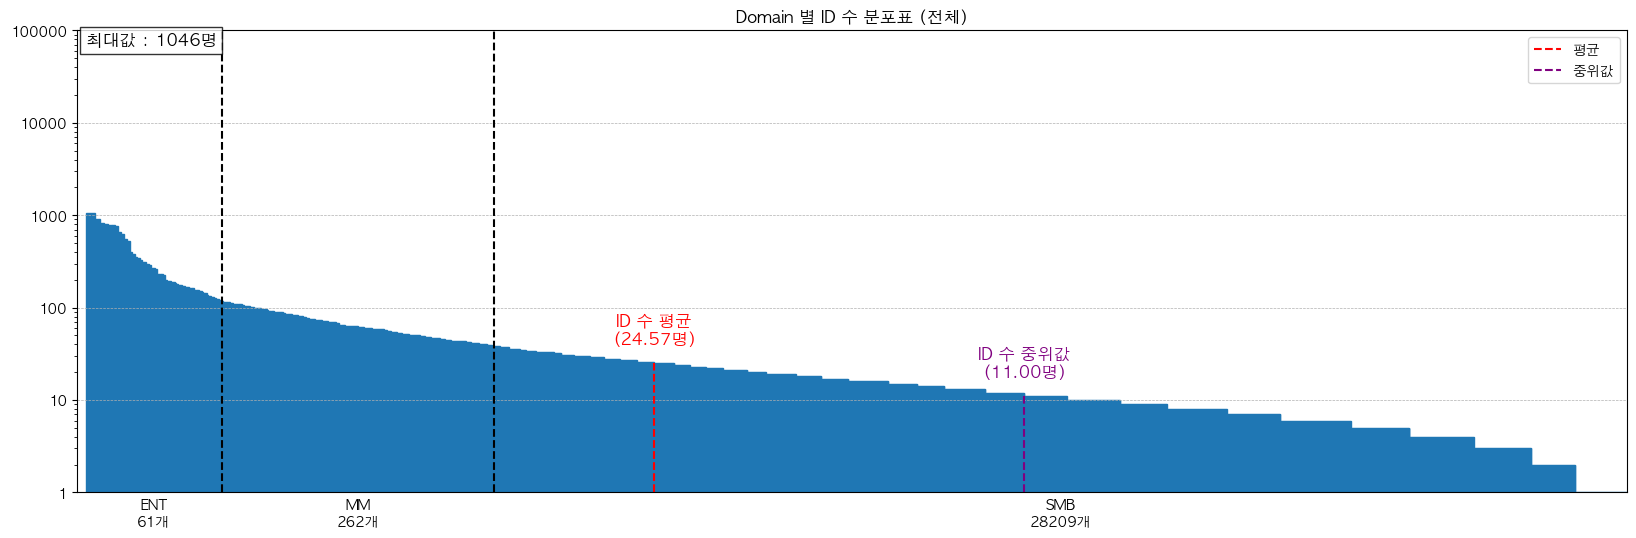

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 정렬 (내림차순)
data = works['사용량'].sort_values(ascending=False).reset_index(drop=True)

# y축: 데이터 값
y = data

# x축 간격 설정 (폭 증가율 반영)
n_bars = len(data)  # 막대 개수
x = np.linspace(0, 10, n_bars)**0.66  # x축 값을 비선형으로 조정하여 증가율 완만하게 설정

# 막대 폭 설정
widths = np.diff(np.append(x, x[-1] + (x[-1] - x[-2])))  # 막대 폭은 x축 간격 기반으로 계산

# 평균 및 중위값 계산
mean_value = y.mean()  # 사용량 평균
median_value = y.median()  # 사용량 중위값

# 평균 및 중위값의 x축 위치 찾기
mean_idx = np.abs(y - mean_value).idxmin()  # 평균값에 가장 가까운 인덱스
median_idx = np.abs(y - median_value).idxmin()  # 중위값에 가장 가까운 인덱스
mean_x = x[mean_idx]
median_x = x[median_idx]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(20, 6))  # 전체 그래프 크기 고정

# 막대 그래프
for i in range(n_bars):
    ax.bar(x[i], y[i], width=widths[i], color='C0', edgecolor='C0', align='edge')  # 색상을 남색으로 설정

# y축 설정 (1부터 100000까지 10 단위로)
ax.set_yscale('log')
ax.set_ylim(1, 100000)
ax.set_yticks([10**i for i in range(0, 6)])
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

# x축 간격 조정 (y축과 딱 붙이기)
ax.set_xlim(-widths[0], x[-1] + widths[-1])  # 첫 번째 막대와 y축이 딱 붙도록 설정

# ENT, MM 수직선 (그래프 박스 내부까지 표시)
x_1 = x[61]
x_2 = x[323]
ax.axvline(x=x_1, color='black', linestyle='--', linewidth=1.5)  # ENT
ax.axvline(x=x_2, color='black', linestyle='--', linewidth=1.5)  # MM

# 평균 및 중위값 수직선 (막대 높이까지 표시, 레이블 위치 조정)
ax.plot([mean_x, mean_x], [1, y[mean_idx]], color='red', linestyle='--', linewidth=1.5, label='평균')
ax.plot([median_x, median_x], [1, y[median_idx]], color='purple', linestyle='--', linewidth=1.5, label='중위값')

# 평균 및 중위값 레이블
ax.text(mean_x, y[mean_idx] * 1.5, f'ID 수 평균\n({mean_value:.2f}명)', color='red', ha='center', va='bottom', fontsize=12)
ax.text(median_x, y[median_idx] * 1.5, f'ID 수 중위값\n({median_value:.2f}명)', color='purple', ha='center', va='bottom', fontsize=12)

# 쌍방향 화살표와 영역 표시
y_mid = 0.5  # 화살표 및 텍스트의 y축 위치
ax.annotate('', xy=(0, y_mid), xytext=(x_1, y_mid), 
            arrowprops=dict(arrowstyle='<->', color='black'))
ax.text(x_1 / 2, y_mid * 1.2, 'ENT\n61개', ha='center', va='center', fontsize=10)

ax.annotate('', xy=(x_1, y_mid), xytext=(x_2, y_mid), 
            arrowprops=dict(arrowstyle='<->', color='black'))
ax.text((x_1 + x_2) / 2, y_mid * 1.2, 'MM\n262개', ha='center', va='center', fontsize=10)

ax.annotate('', xy=(x_2, y_mid), xytext=(x[-1], y_mid), 
            arrowprops=dict(arrowstyle='<->', color='black'))
ax.text((x_2 + x[-1]) / 2, y_mid * 1.2, 'SMB\n28209개', ha='center', va='center', fontsize=10)

# x축 제거 (눈금 및 라인 제거)
ax.set_xticks([])
ax.set_xticklabels([])

max_value = y.max()  # 사용량 최대값
ax.text(0, ax.get_ylim()[1] * 0.95, f'최대값 : {int(max_value)}명', 
        fontsize=12, color='black', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.8))

# 제목 추가
plt.title('Domain 별 ID 수 분포표 (전체)')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


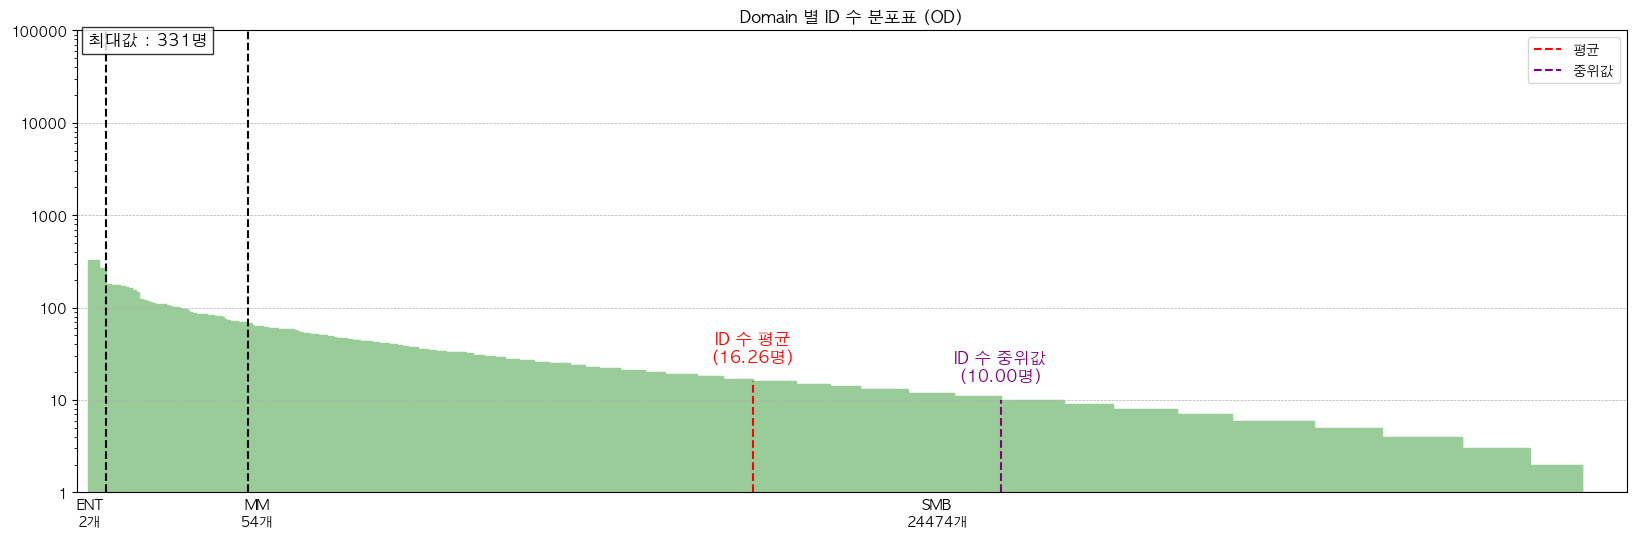

In [70]:
# 데이터 정렬 (내림차순)
data = works_od['사용량'].sort_values(ascending=False).reset_index(drop=True)

# y축: 데이터 값
y = data

# x축 간격 설정 (폭 증가율 반영)
n_bars = len(data)  # 막대 개수
x = np.linspace(0, 10, n_bars)**0.66  # x축 값을 비선형으로 조정하여 증가율 완만하게 설정

# 막대 폭 설정
widths = np.diff(np.append(x, x[-1] + (x[-1] - x[-2])))  # 막대 폭은 x축 간격 기반으로 계산

# 평균 및 중위값 계산
mean_value = y.mean()  # 사용량 평균
median_value = y.median()  # 사용량 중위값

# 평균 및 중위값의 x축 위치 찾기
mean_idx = np.abs(y - mean_value).idxmin()  # 평균값에 가장 가까운 인덱스
median_idx = np.abs(y - median_value).idxmin()  # 중위값에 가장 가까운 인덱스
mean_x = x[mean_idx]
median_x = x[median_idx]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(20, 6))  # 전체 그래프 크기 고정

# 막대 그래프
for i in range(n_bars):
    ax.bar(x[i], y[i], width=widths[i], color='#99CC99', edgecolor='#99CC99', align='edge')

# y축 설정 (1부터 100000까지 10 단위로)
ax.set_yscale('log')
ax.set_ylim(1, 100000)
ax.set_yticks([10**i for i in range(0, 6)])
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

# x축 간격 조정 (y축과 딱 붙이기)
ax.set_xlim(-widths[0], x[-1] + widths[-1])  # 첫 번째 막대와 y축이 딱 붙도록 설정

# ENT, MM 수직선 (그래프 박스 내부까지 표시)
x_1 = x[2]
x_2 = x[56]
ax.axvline(x=x_1, color='black', linestyle='--', linewidth=1.5)  # ENT
ax.axvline(x=x_2, color='black', linestyle='--', linewidth=1.5)  # MM

# 평균 및 중위값 수직선 (막대 높이까지 표시, 레이블 위치 조정)
ax.plot([mean_x, mean_x], [1, y[mean_idx]], color='red', linestyle='--', linewidth=1.5, label='평균')
ax.plot([median_x, median_x], [1, y[median_idx]], color='purple', linestyle='--', linewidth=1.5, label='중위값')

# 평균 및 중위값 레이블
ax.text(mean_x, y[mean_idx] * 1.5, f'ID 수 평균\n({mean_value:.2f}명)', color='red', ha='center', va='bottom', fontsize=12)
ax.text(median_x, y[median_idx] * 1.5, f'ID 수 중위값\n({median_value:.2f}명)', color='purple', ha='center', va='bottom', fontsize=12)

# 쌍방향 화살표와 영역 표시
y_mid = 0.5  # 화살표 및 텍스트의 y축 위치
ax.annotate('', xy=(0, y_mid), xytext=(x_1, y_mid), 
            arrowprops=dict(arrowstyle='<->', color='black'))

# ENT 텍스트를 약간 왼쪽으로 이동
ent_text_x = x_1 * 0.1  # 기존 x_1의 위치에서 약간 왼쪽으로 이동
ax.text(ent_text_x, y_mid * 1.2, 'ENT\n2개', ha='center', va='center', fontsize=10)

ax.annotate('', xy=(x_1, y_mid), xytext=(x_2, y_mid), 
            arrowprops=dict(arrowstyle='<->', color='black'))

# MM 텍스트를 약간 오른쪽으로 이동
mm_text_x = (x_1 + x_2) / 2 * 1.9  # 기존 위치에서 오른쪽으로 이동
ax.text(mm_text_x, y_mid * 1.2, 'MM\n54개', ha='center', va='center', fontsize=10)

ax.annotate('', xy=(x_2, y_mid), xytext=(x[-1], y_mid), 
            arrowprops=dict(arrowstyle='<->', color='black'))
ax.text((x_2 + x[-1]) / 2, y_mid * 1.2, 'SMB\n24474개', ha='center', va='center', fontsize=10)

# x축 제거 (눈금 및 라인 제거)
ax.set_xticks([])
ax.set_xticklabels([])

max_value = y.max()  # 사용량 최대값
ax.text(0, ax.get_ylim()[1] * 0.95, f'최대값 : {int(max_value)}명', 
        fontsize=12, color='black', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.8))

# 제목 추가
plt.title('Domain 별 ID 수 분포표 (OD)')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

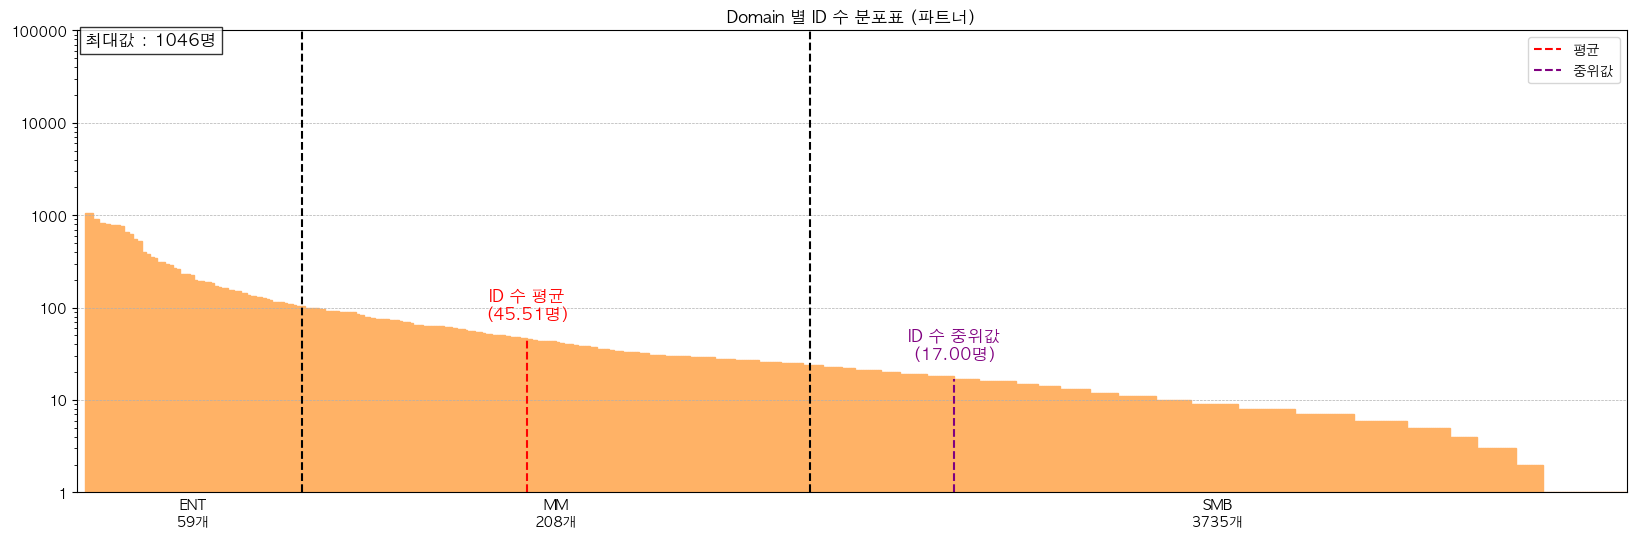

In [71]:
# 데이터 정렬 (내림차순)
data = works_pt['사용량'].sort_values(ascending=False).reset_index(drop=True)

# y축: 데이터 값
y = data

# x축 간격 설정 (폭 증가율 반영)
n_bars = len(data)  # 막대 개수
x = np.linspace(0, 10, n_bars)**0.8  # x축 값을 비선형으로 조정하여 증가율 완만하게 설정

# 막대 폭 설정
widths = np.diff(np.append(x, x[-1] + (x[-1] - x[-2])))  # 막대 폭은 x축 간격 기반으로 계산

# 평균 및 중위값 계산
mean_value = y.mean()  # 사용량 평균
median_value = y.median()  # 사용량 중위값

# 평균 및 중위값의 x축 위치 찾기
mean_idx = np.abs(y - mean_value).idxmin()  # 평균값에 가장 가까운 인덱스
median_idx = np.abs(y - median_value).idxmin()  # 중위값에 가장 가까운 인덱스
mean_x = x[mean_idx]
median_x = x[median_idx]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(20, 6))  # 전체 그래프 크기 고정

# 막대 그래프
for i in range(n_bars):
    ax.bar(x[i], y[i], width=widths[i], color='#FFB266', edgecolor='#FFB266', align='edge')

# y축 설정 (1부터 100000까지 10 단위로)
ax.set_yscale('log')
ax.set_ylim(1, 100000)
ax.set_yticks([10**i for i in range(0, 6)])
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

# x축 간격 조정 (y축과 딱 붙이기)
ax.set_xlim(-widths[0], x[-1] + widths[-1])  # 첫 번째 막대와 y축이 딱 붙도록 설정

# ENT, MM 수직선 (그래프 박스 내부까지 표시)
x_1 = x[59]
x_2 = x[267]
ax.axvline(x=x_1, color='black', linestyle='--', linewidth=1.5)  # ENT
ax.axvline(x=x_2, color='black', linestyle='--', linewidth=1.5)  # MM

# 평균 및 중위값 수직선 (막대 높이까지 표시, 레이블 위치 조정)
ax.plot([mean_x, mean_x], [1, y[mean_idx]], color='red', linestyle='--', linewidth=1.5, label='평균')
ax.plot([median_x, median_x], [1, y[median_idx]], color='purple', linestyle='--', linewidth=1.5, label='중위값')

# 평균 및 중위값 레이블
ax.text(mean_x, y[mean_idx] * 1.5, f'ID 수 평균\n({mean_value:.2f}명)', color='red', ha='center', va='bottom', fontsize=12)
ax.text(median_x, y[median_idx] * 1.5, f'ID 수 중위값\n({median_value:.2f}명)', color='purple', ha='center', va='bottom', fontsize=12)

# 쌍방향 화살표와 영역 표시
y_mid = 0.5  # 화살표 및 텍스트의 y축 위치
ax.annotate('', xy=(0, y_mid), xytext=(x_1, y_mid), 
            arrowprops=dict(arrowstyle='<->', color='black'))
ax.text(x_1 / 2, y_mid * 1.2, 'ENT\n59개', ha='center', va='center', fontsize=10)

ax.annotate('', xy=(x_1, y_mid), xytext=(x_2, y_mid), 
            arrowprops=dict(arrowstyle='<->', color='black'))
ax.text((x_1 + x_2) / 2, y_mid * 1.2, 'MM\n208개', ha='center', va='center', fontsize=10)

ax.annotate('', xy=(x_2, y_mid), xytext=(x[-1], y_mid), 
            arrowprops=dict(arrowstyle='<->', color='black'))
ax.text((x_2 + x[-1]) / 2, y_mid * 1.2, 'SMB\n3735개', ha='center', va='center', fontsize=10)

# x축 제거 (눈금 및 라인 제거)
ax.set_xticks([])
ax.set_xticklabels([])

max_value = y.max()  # 사용량 최대값
ax.text(0, ax.get_ylim()[1] * 0.95, f'최대값 : {int(max_value)}명', 
        fontsize=12, color='black', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.8))

# 제목 추가
plt.title('Domain 별 ID 수 분포표 (파트너)')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()